In [279]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time 
from tqdm import tqdm

In [262]:
G= lambda x,y,z,w : x**2 + y**2 + z**2 + w**2 - 1

In [263]:
def GetVectorf( G,r): 
    v= G(r[0],r[1],r[2],r[3])
    return np.array([v]) 

In [311]:
def GetJacobian(G,r,h=1e-10): 
    dim = 1
    J = np.zeros((dim,4))
    J[0,0] = (G(r[0]+h , r[1] , r[2] , r[3]) - G(r[0]-h , r[1], r[2] , r[3]))/(2*h)
    J[0,1] = (G(r[0] , r[1]+h , r[2] , r[3]) - G(r[0] , r[1]-h, r[2] , r[3]))/(2*h)
    J[0,2] = (G(r[0] , r[1] , r[2]+h , r[3]) - G(r[0] , r[1], r[2]-h , r[3]))/(2*h)
    J[0,3] = (G(r[0] , r[1] , r[2] , r[3]+h) - G(r[0] , r[1], r[2] , r[3]-h))/(2*h)
    return J.T

In [305]:
def GetMetric(G,r): 
    V = GetVectorf(G,r)
    return  np.linalg.norm(V)

In [338]:
def GenerateRandomVector (): 
 #np.zeros((Npoints,dim))
    x = np.random.uniform(-1,1) 
    y = np.random.uniform(-1,1)
    z = np.random.uniform(-1,1)
    w = np.random.uniform(-1,1)
    vector = np.array([x, y, z, w])
    return vector

In [339]:
def GetSolve(G,r,lr = 1e-3 , epoch = int(1e5), error =1e-7):
    
    d = 1 
    it = 0 
    vector_f = np.array([])
    
    R_vector = np.array(r)

    while d > error and it < epoch: 
        
        currentF = GetMetric(G,r)
        J = GetJacobian(G,r)
        Gvector = GetVectorf(G,r)
        #machine learning
        r -= lr*np.dot(J,Gvector)
        
        R_vector = np.vstack((R_vector,r))
        
        NewF = GetMetric(G,r)
        vector_f = np.append(vector_f , NewF)
        
        d = np.abs(currentF-NewF)/NewF
        
        #if it%500 == 0 : 
         #   print(it,d)
          #  clear_output(wait=True)
           # time.sleep(0.02)
        it += 1
        
    #if d < error : 
     #       print ("Entranamiento completo", d, "iteraciones" , it)
    if it == epoch:
            print("Entrenamiento no completado")
            
    return r 
            

In [340]:
Valores = np.zeros((1000 , 4))
for i in tqdm(range(10**3)) :  
    Xsol = GetSolve(G,GenerateRandomVector())
    Valores[i,0] = Xsol[0]
    Valores[i,1] = Xsol[1]
    Valores[i,2] = Xsol[2]
    Valores[i,3] = Xsol[3]

100%|██████████| 1000/1000 [43:13<00:00,  2.59s/it]


In [341]:
print(Valores)
print(len(Valores))

[[ 0.4849735  -0.11422815 -0.6741063   0.5452828 ]
 [-0.29096567  0.63578202 -0.71153813  0.06952476]
 [ 0.25619385 -0.78442008  0.01981127  0.56449745]
 ...
 [ 0.76038645  0.41435267 -0.45036684  0.2174719 ]
 [-0.15620142  0.55001979  0.38011959 -0.72704088]
 [ 0.65396436 -0.06546455  0.4951707   0.56819977]]
1000


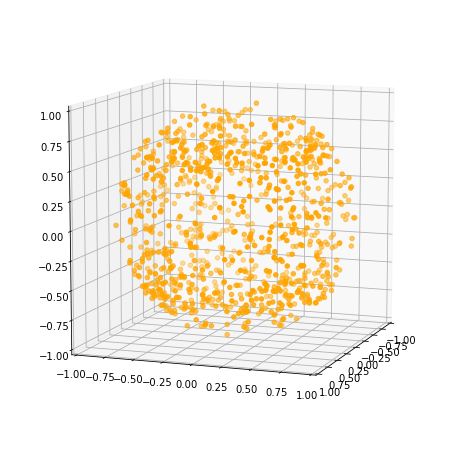

In [345]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection = '3d')

#configurar límites de los ejes
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

ax.view_init(10, 20)
X=Valores[:,0]
Y=Valores[:,1]
Z=Valores[:,2]
ax.scatter(X,Y,Z,color='orange')
plt.show()
